# Pre-processing and EDA on CASAS dataset (Kyoto)

In [1]:
# Import Python libraries
from datetime import timedelta
import datetime
import re
import matplotlib.pyplot as plt
from statistics import mean,stdev
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def get_datetime(newVal):
    stuff = re.split('\s+', newVal)
    date = re.split('-', stuff[0])
    time = re.split(':', stuff[1])
    sec = []
    if re.search('\.', time[2]) == None:
        sec.append(time[2])
        sec.append("0")
    else:
        sec = re.split('\.', time[2])
        dt = datetime.datetime(int(date[0]),
                          int(date[1]),
                          int(date[2]),
                          int(time[0]),
                          int(time[1]),
                          int(sec[0]),
                          int(sec[1]))
    return dt

In [3]:
filtered = []
inp = open("./twor.2010/twor.2009/data")
for line in inp:
    x = str(str(line).strip()).split()
    if len(x) > 5:
        filtered.append(x)
inp.close()
inp = open("./twor.2010/twor.summer.2009/annotated")
for line in inp:
    x = str(str(line).strip()).split()
    if len(x) > 5:
        filtered.append(x)
inp.close()
inp = open("./twor.2010/twor.2010/data")
for line in inp:
    x = str(str(line).strip()).split()
    if len(x) > 5:
        filtered.append(x)
inp.close()
print(filtered[5:15])

[['2009-02-02', '07:46:55.1379', 'M48', 'OFF', 'R2_Bed_to_Toilet', 'end'], ['2009-02-02', '07:47:19.239909', 'M19', 'ON', 'Meal_Preparation', 'begin'], ['2009-02-02', '07:55:23.86221', 'M16', 'OFF', 'Meal_Preparation', 'end'], ['2009-02-02', '10:19:49.5415', 'M19', 'ON', 'Meal_Preparation', 'begin'], ['2009-02-02', '10:41:52.005729', 'M09', 'ON', 'Meal_Preparation', 'end'], ['2009-02-02', '10:51:07.09342', 'M46', 'ON', 'R2_Personal_Hygiene', 'begin'], ['2009-02-02', '11:17:06.6219', 'M49', 'OFF', 'R2_Personal_Hygiene', 'end'], ['2009-02-02', '11:41:34.140719', 'M07', 'ON', 'Watch_TV', 'begin'], ['2009-02-02', '12:31:01.550129', 'M23', 'ON', 'Watch_TV', 'end'], ['2009-02-02', '14:29:03.19545', 'M32', 'ON', 'R1_Work', 'begin']]


In [4]:
df=pd.DataFrame(filtered,columns=["Date","Time","Sensor","Status","Activity","Begin_or_End"])
df.head()

,Date,Time,Sensor,Status,Activity,Begin_or_End
0,2009-02-02,07:15:16.575809,M35,ON,R1_Bed_to_Toilet,begin
1,2009-02-02,07:21:03.792759,M41,OFF,R1_Bed_to_Toilet,end
2,2009-02-02,07:21:04.014729,M40,OFF,R1_Personal_Hygiene,begin
3,2009-02-02,07:38:33.946559,M36,ON,R1_Personal_Hygiene,end
4,2009-02-02,07:44:12.597919,M49,ON,R2_Bed_to_Toilet,begin


In [5]:
df.shape

(11056, 6)

In [6]:
df['Activity']=df['Activity'].str.lower()
df.loc[df.Activity=='clean', 'Activity'] = 'cleaning'
len(df['Activity'].unique())

39

In [7]:
df['Sensor'].value_counts()

M037    1303
M045     985
M007     681
M017     631
D005     536
        ... 
T005       1
L003       1
M24        1
T002       1
D014       1
Name: Sensor, Length: 114, dtype: int64

In [8]:
df.dtypes

Date            object
Time            object
Sensor          object
Status          object
Activity        object
Begin_or_End    object
dtype: object

In [9]:
df["Date_Time"]=df["Date"]+' '+df["Time"]

In [10]:
df.head()

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time
0,2009-02-02,07:15:16.575809,M35,ON,r1_bed_to_toilet,begin,2009-02-02 07:15:16.575809
1,2009-02-02,07:21:03.792759,M41,OFF,r1_bed_to_toilet,end,2009-02-02 07:21:03.792759
2,2009-02-02,07:21:04.014729,M40,OFF,r1_personal_hygiene,begin,2009-02-02 07:21:04.014729
3,2009-02-02,07:38:33.946559,M36,ON,r1_personal_hygiene,end,2009-02-02 07:38:33.946559
4,2009-02-02,07:44:12.597919,M49,ON,r2_bed_to_toilet,begin,2009-02-02 07:44:12.597919


In [11]:
df["Date_Time"]=df["Date_Time"].apply(lambda x:get_datetime(x))

In [12]:
df["Weekday"]=df["Date_Time"].apply(lambda x: x.strftime("%A"))

In [13]:
df.sort_values(by=['Date_Time'], inplace=True, ascending=True)
df.head()

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
0,2009-02-02,07:15:16.575809,M35,ON,r1_bed_to_toilet,begin,2009-02-02 07:15:16.575809,Monday
1,2009-02-02,07:21:03.792759,M41,OFF,r1_bed_to_toilet,end,2009-02-02 07:21:03.792759,Monday
2,2009-02-02,07:21:04.014729,M40,OFF,r1_personal_hygiene,begin,2009-02-02 07:21:04.014729,Monday
3,2009-02-02,07:38:33.946559,M36,ON,r1_personal_hygiene,end,2009-02-02 07:38:33.946559,Monday
4,2009-02-02,07:44:12.597919,M49,ON,r2_bed_to_toilet,begin,2009-02-02 07:44:12.597919,Monday


In [14]:
df["Weekday"].value_counts()

Monday       1953
Tuesday      1928
Thursday     1860
Wednesday    1845
Friday       1758
Sunday        869
Saturday      843
Name: Weekday, dtype: int64

In [15]:
d=pd.DataFrame()
d['Dates']=list(df['Date'].unique())
d['Dates']=pd.to_datetime(d['Dates'])
d['Months']=d['Dates'].apply(lambda x: x.strftime("%b"))
d['Dates']=d['Dates'].apply(lambda x: x.strftime("%A"))
d['Dates'].value_counts()

Monday       48
Tuesday      48
Wednesday    48
Friday       47
Thursday     46
Saturday     39
Sunday       36
Name: Dates, dtype: int64

In [16]:
def datetime_range(start=None, end=None):
    span = end - start
    for i in range(1,span.days + 1):
        yield start + timedelta(days=i)
all_dates=[]
for date in datetime_range(start=df["Date_Time"].min(),end= df["Date_Time"].max()):
    all_dates.append(date.strftime("%A"))

In [17]:
d['Dates'].shape[0]

312

In [18]:
int(((df["Date_Time"].max()-df["Date_Time"].min()).total_seconds())/(60*60*24))

452

In [19]:
452-312

140

### 140 days data found to be missing

In [20]:
df.dtypes

Date                    object
Time                    object
Sensor                  object
Status                  object
Activity                object
Begin_or_End            object
Date_Time       datetime64[ns]
Weekday                 object
dtype: object

### Activity vs Time taken

In [21]:
activities = list(df["Activity"].unique())
activities

['r1_bed_to_toilet',
 'r1_personal_hygiene',
 'r2_bed_to_toilet',
 'meal_preparation',
 'r2_personal_hygiene',
 'watch_tv',
 'r1_work',
 'r2_work',
 'r1_sleep',
 'r2_sleep',
 'wash_bathtub',
 'cleaning',
 'study',
 'r1_wakeup',
 'grooming',
 'r1_shower',
 'cooking',
 'r2_wakeup',
 'r2_shower',
 'bed_toilet_transition',
 'r1_wandering_in_room',
 'r1_bed_toilet_transition',
 'r1_bathing',
 'r1_meal_preparation',
 'r1_leave_home',
 'r2_wandering_in_room',
 'r2_meal_preparation',
 'r2_eating',
 'r2_bathing',
 'r2_leave_home',
 'r1_enter_home',
 'r2_watch_tv',
 'r1_eating',
 'r1_watch_tv',
 'r2_bed_toilet_transition',
 'r1_housekeeping',
 'r2_enter_home',
 'r1_sleeping_not_in_bed',
 'r2_sleeping_not_in_bed']

In [22]:
for i in activities:
    print(i)
    a = len(df[df['Activity']==i])
    df_i=df[df['Activity']==i]
    b_c = len(df_i[df_i['Begin_or_End']=='begin'])
    e_c = len(df_i[df_i['Begin_or_End']=='end'])
    print(a,b_c,e_c)
    print(b_c == e_c)

r1_bed_to_toilet
68 34 34
True
r1_personal_hygiene
1190 595 595
True
r2_bed_to_toilet
78 39 39
True
meal_preparation
237 118 119
False
r2_personal_hygiene
1146 573 573
True
watch_tv
62 31 31
True
r1_work
2017 1008 1009
False
r2_work
1656 828 828
True
r1_sleep
722 361 361
True
r2_sleep
732 366 366
True
wash_bathtub
2 1 1
True
cleaning
60 30 30
True
study
18 9 9
True
r1_wakeup
96 48 48
True
grooming
94 47 47
True
r1_shower
82 41 41
True
cooking
398 199 199
True
r2_wakeup
50 25 25
True
r2_shower
56 28 28
True
bed_toilet_transition
4 2 2
True
r1_wandering_in_room
30 15 15
True
r1_bed_toilet_transition
48 24 24
True
r1_bathing
62 31 31
True
r1_meal_preparation
262 131 131
True
r1_leave_home
294 147 147
True
r2_wandering_in_room
10 5 5
True
r2_meal_preparation
368 184 184
True
r2_eating
142 71 71
True
r2_bathing
110 55 55
True
r2_leave_home
136 68 68
True
r1_enter_home
170 85 85
True
r2_watch_tv
234 117 117
True
r1_eating
52 26 26
True
r1_watch_tv
220 110 110
True
r2_bed_toilet_transition
32

#### The above piece of code is to check the number of begins and ends for each activity.

In [23]:
## The condition in the below code  ttemp>0 and ttemp<1440 is to ensure that we 
## are considering an 24 hr time interval for any activity

In [24]:
time_taken={}
for i in activities:
    time_taken[i]=[]
    df_temp=df[df["Activity"]==i]
    df_begin = df_temp[df_temp["Begin_or_End"]=="begin"]
    df_end = df_temp[df_temp["Begin_or_End"]=="end"]
    if df_begin.iloc[0,6]<df_end.iloc[0,6]:
        for j in range(min(len(df_begin),len(df_end))):
            ttemp = (df_end.iloc[j,6]-df_begin.iloc[j,6]).total_seconds()/60
            if ttemp>0 and ttemp<1440:
                time_taken[i].append(ttemp)
    else:
        for j in range(min(len(df_begin),len(df_end))-1):
            ttemp = (df_end.iloc[j,6]-df_begin.iloc[j,6]).total_seconds()/60
            if ttemp>0 and ttemp<1440:
                time_taken[i].append(ttemp)

In [25]:
time_taken

{'r1_bed_to_toilet': [5.786949166666667,
  6.220605916666667,
  14.0562448,
  21.017409216666668,
  19.954922416666665,
  3.028845,
  13.460069416666666,
  2.84207525,
  1.5549286666666666,
  2.0442419333333333,
  15.400219116666667,
  15.363202666666666,
  15.40027,
  1.4671632000000001,
  3.3497290333333334,
  2.2755225,
  2.03295,
  3.9253948333333333,
  17.076661166666668,
  24.27925683333333,
  22.376920966666667,
  1.1270908666666666,
  20.948078683333332,
  17.638394916666666,
  1.927846,
  23.313993583333335,
  1.4761743333333333,
  1.3642294166666666,
  1.9838877333333333,
  24.077132566666666,
  21.6662594,
  2.1422408666666666,
  4.029130883333333,
  2.4500739499999997],
 'r1_personal_hygiene': [17.498863833333335,
  6.481072299999999,
  3.9327509333333333,
  19.605375166666665,
  19.652595333333334,
  5.009525999999999,
  4.3582038,
  1.1701255333333334,
  17.721899683333334,
  5.117475483333333,
  6.39848955,
  3.910457983333333,
  17.416279550000002,
  7.0623475000000004,

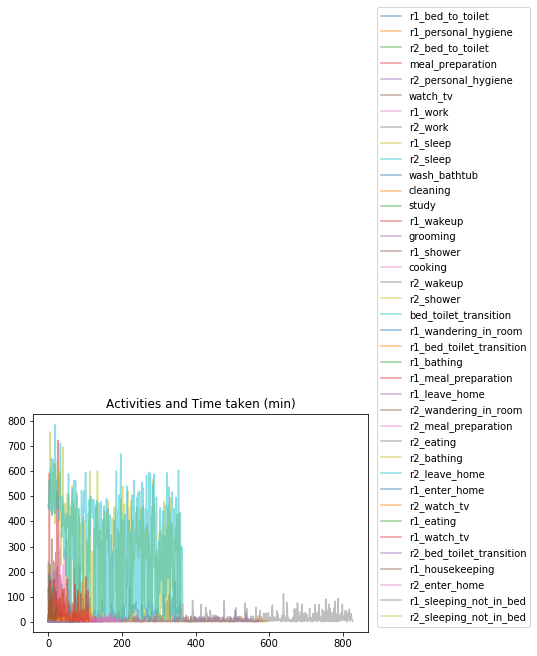

In [26]:
for i in activities:
    plt.plot(time_taken[i],label=i,alpha=0.5)
plt.title('Activities and Time taken (min)')
plt.legend(loc='lower right',bbox_to_anchor=(1.5,0))

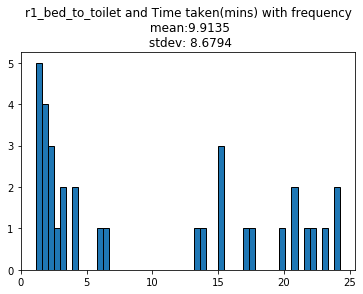

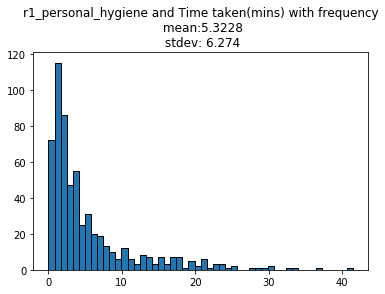

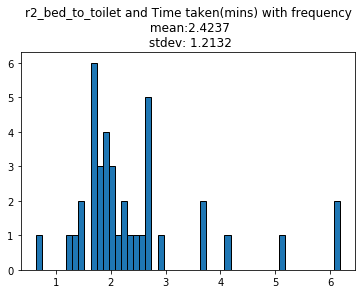

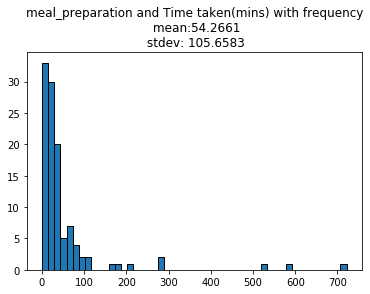

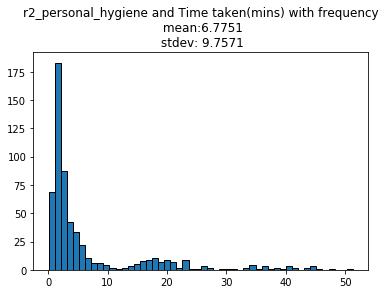

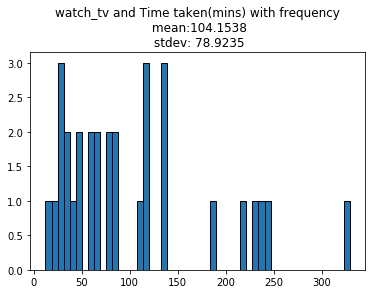

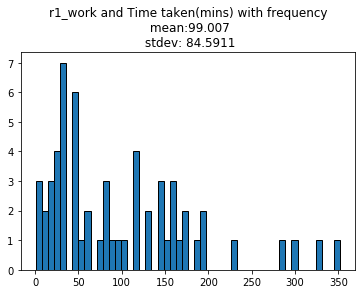

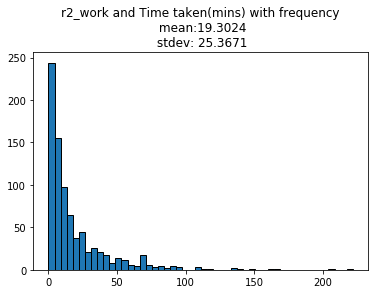

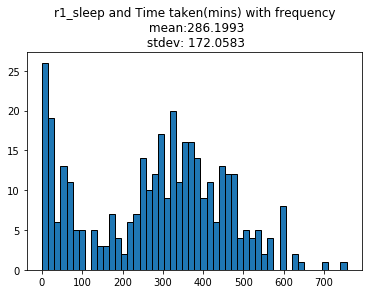

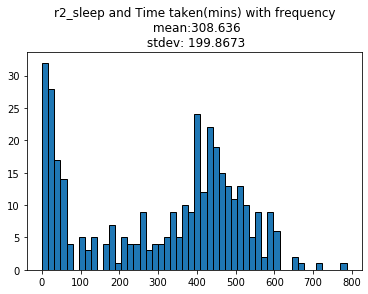

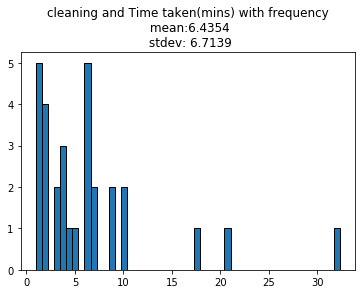

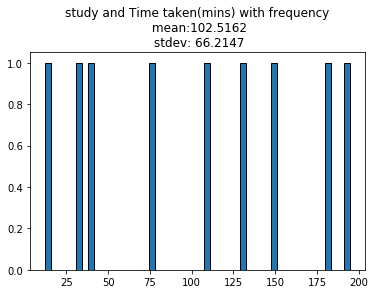

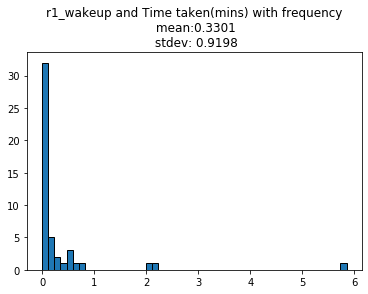

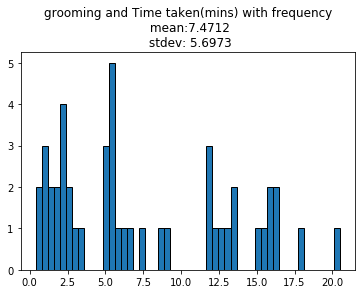

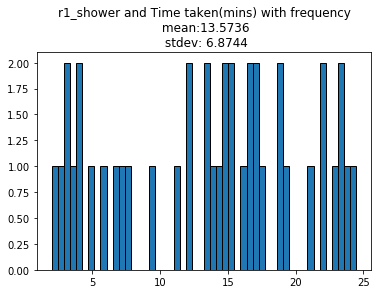

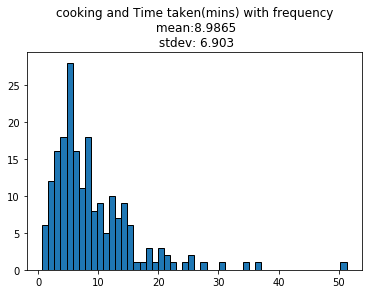

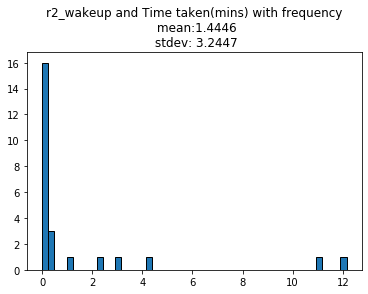

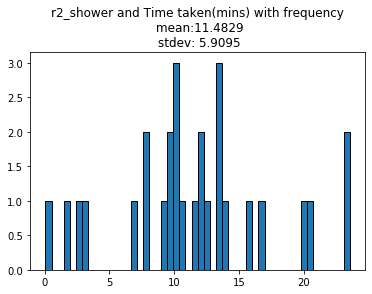

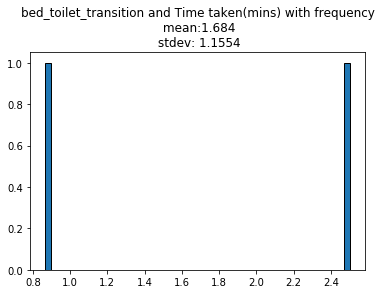

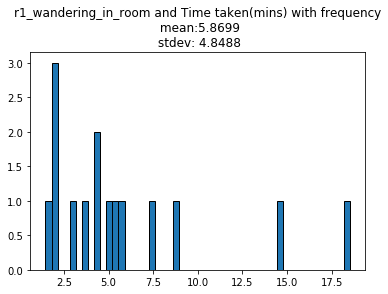

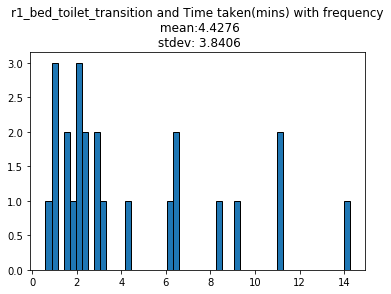

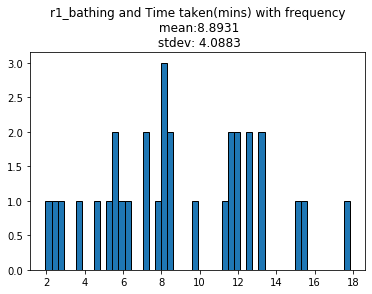

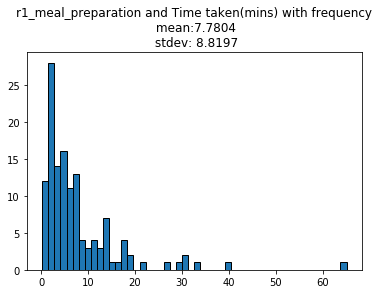

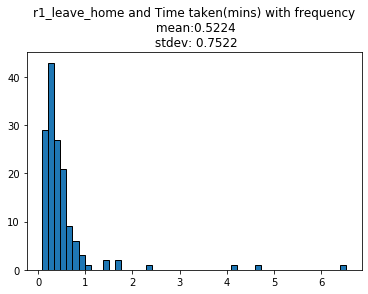

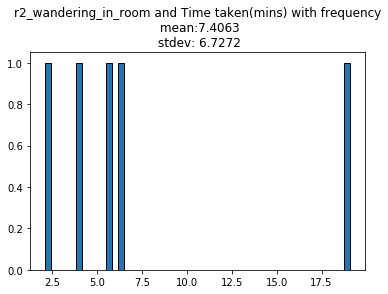

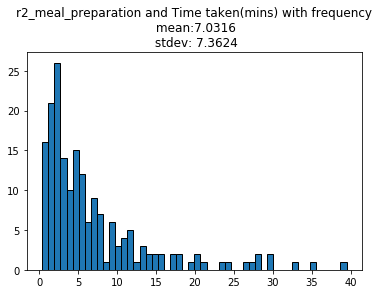

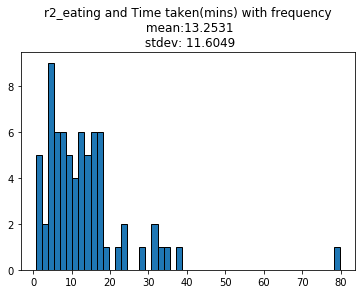

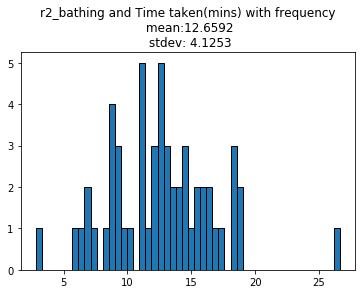

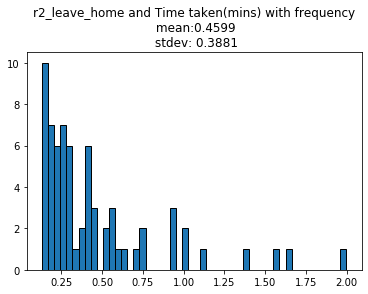

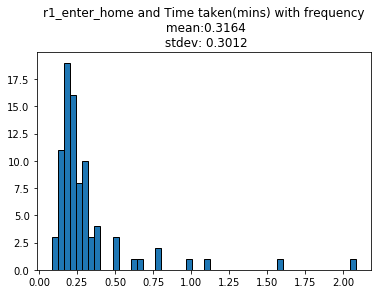

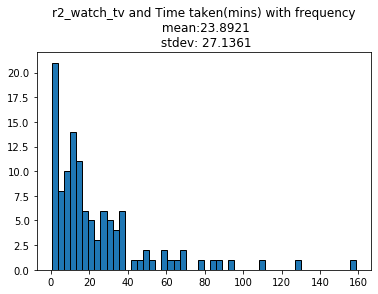

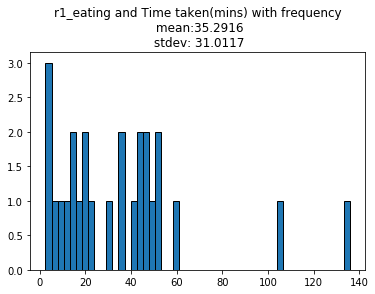

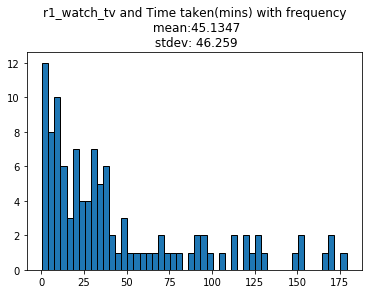

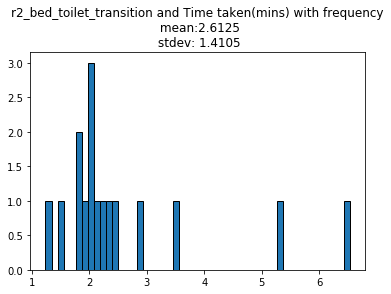

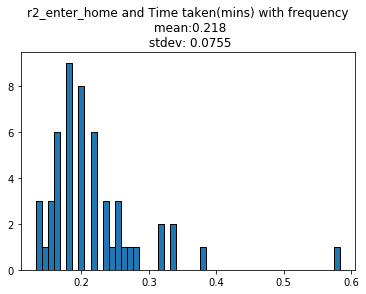

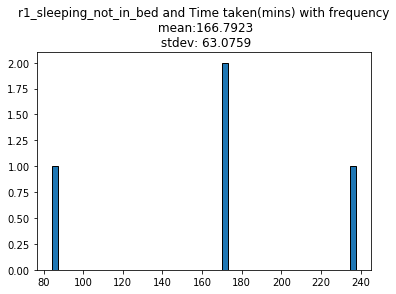

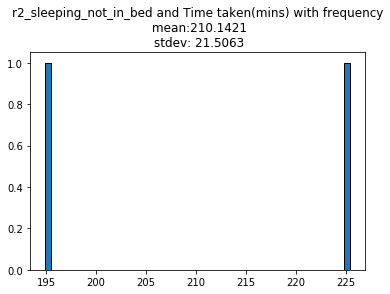

In [27]:
for i in activities:
    if len(time_taken[i])>1:
        plt.hist(time_taken[i],edgecolor = 'black',bins = 50)
        plt.title(i+' and Time taken(mins) with frequency\n mean:' +str(round(mean(time_taken[i]),4))+'\n stdev: '+str(round(stdev(time_taken[i]),4)))
        plt.show()

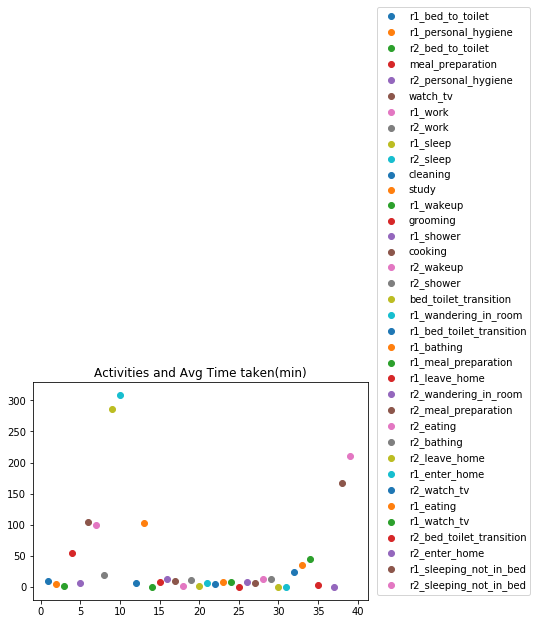

In [28]:
for i in range(len(activities)):
    if len(time_taken[activities[i]])>1:
        plt.scatter(i+1,mean(time_taken[activities[i]]),label=activities[i])
plt.title('Activities and Avg Time taken(min)')
plt.legend(loc='lower right',bbox_to_anchor=(1.5,0))

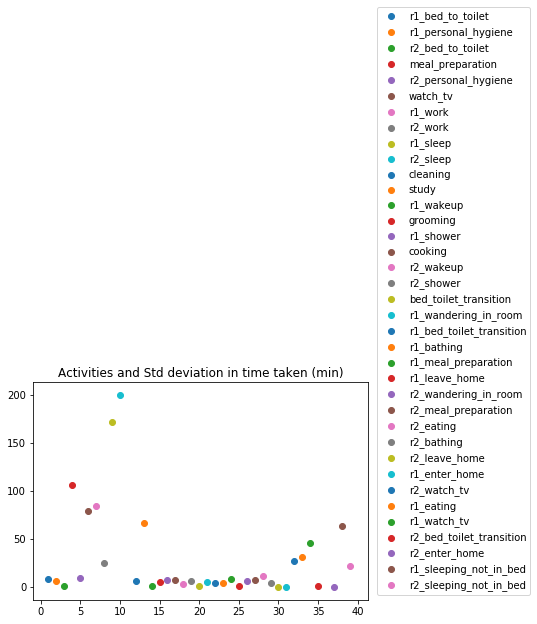

In [29]:
for i in range(len(activities)):
    if len(time_taken[activities[i]])>1:
        plt.scatter(i+1,stdev(time_taken[activities[i]]),label=activities[i])
plt.title('Activities and Std deviation in time taken (min)')
plt.legend(loc='lower right',bbox_to_anchor=(1.5,0))

### Activities vs Usual time they are done

In [30]:
clock_times_weekday={}
clock_times_weekend={}
for i in activities:
    clock_times_weekday[i]=[]
    clock_times_weekend[i]=[]
    for j in range(0,24):
        clock_times_weekday[i].append(0)
        clock_times_weekend[i].append(0)
    df_temp=df[df["Activity"]==i]
    df_begin = df_temp[df_temp["Begin_or_End"]=="begin"]
    for j in range(len(df_begin)):
        if df_begin.iloc[j,7]=='Saturday' or df_begin.iloc[j,7]=='Sunday':
            clock_times_weekend[i][df_begin.iloc[j,6].hour]+=1
        else:
            clock_times_weekday[i][df_begin.iloc[j,6].hour]+=1

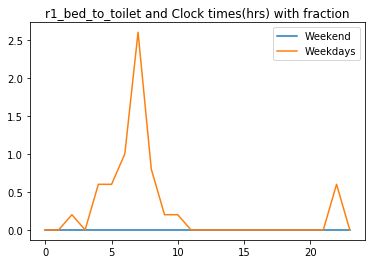

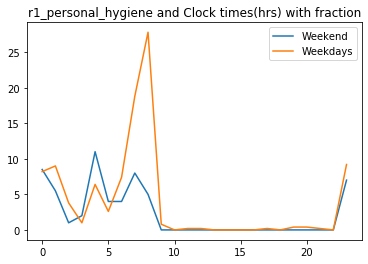

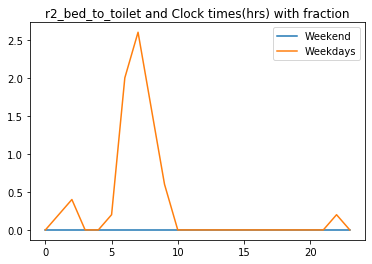

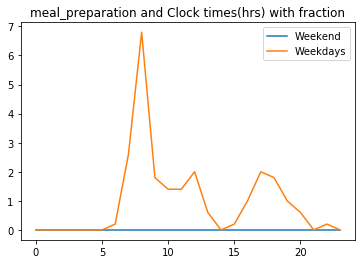

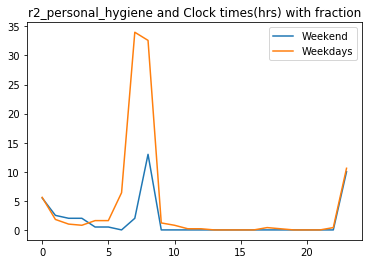

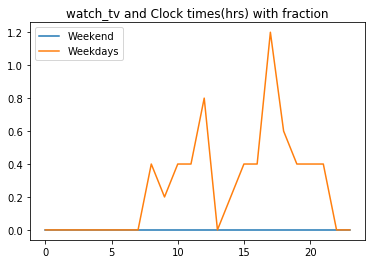

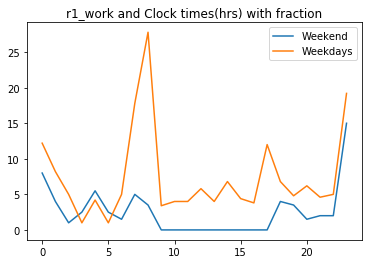

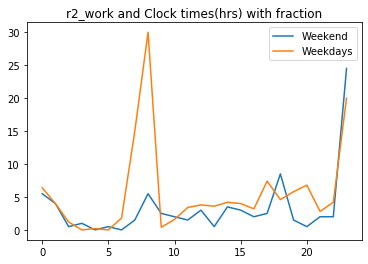

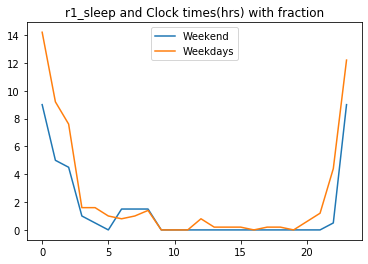

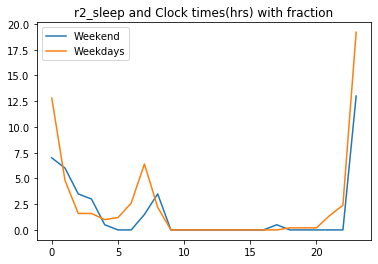

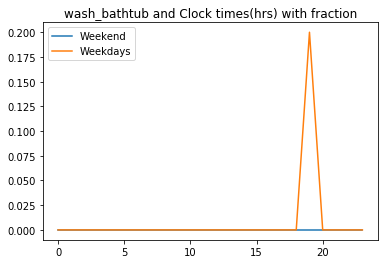

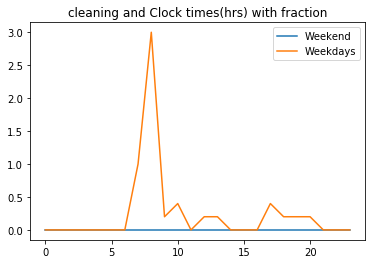

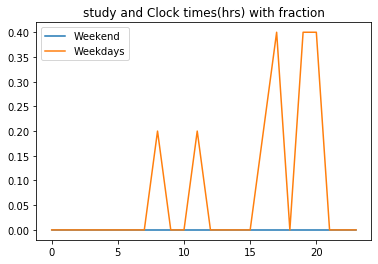

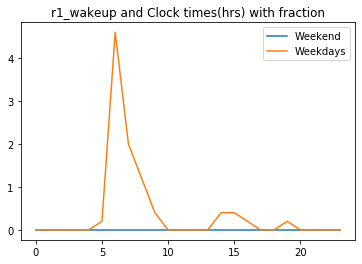

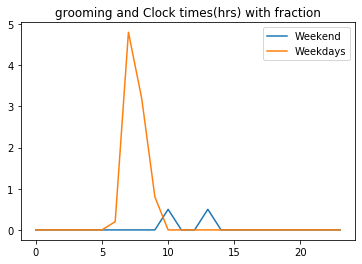

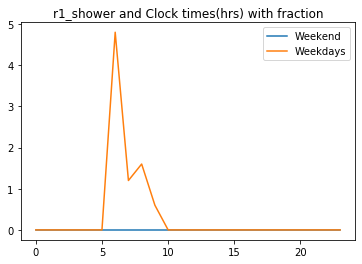

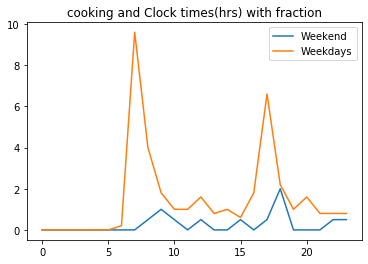

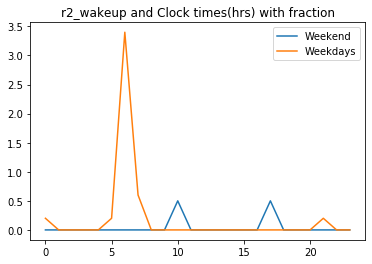

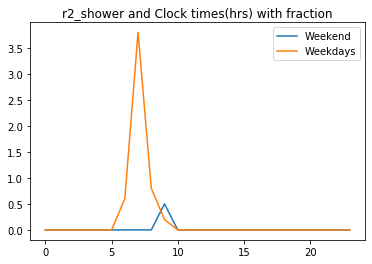

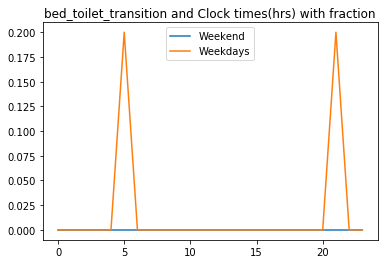

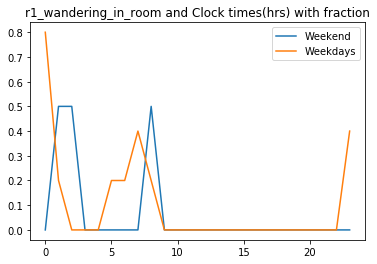

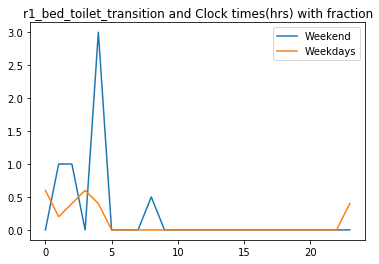

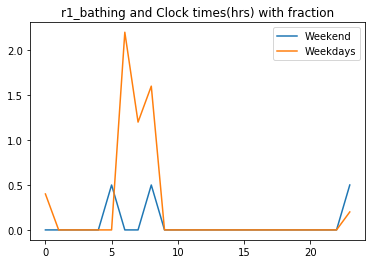

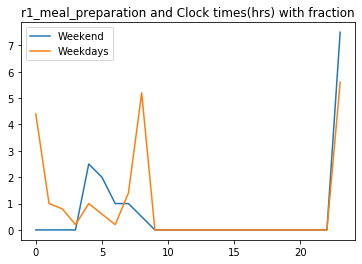

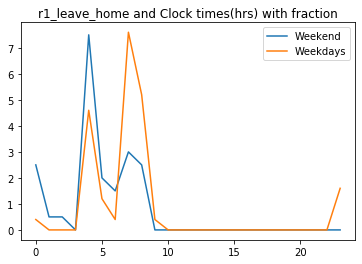

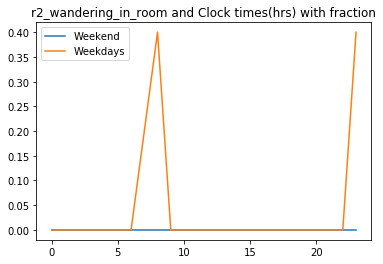

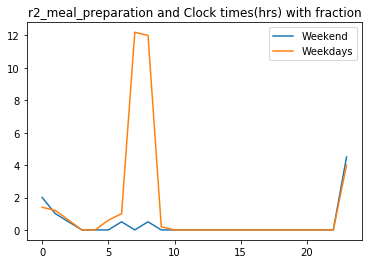

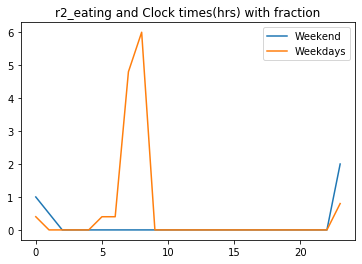

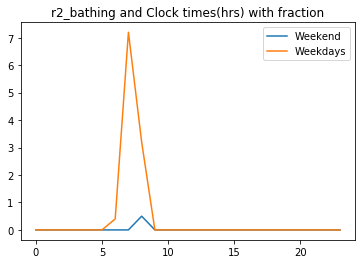

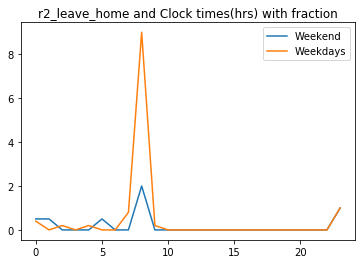

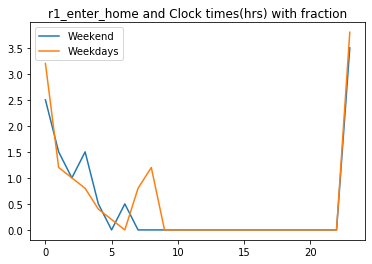

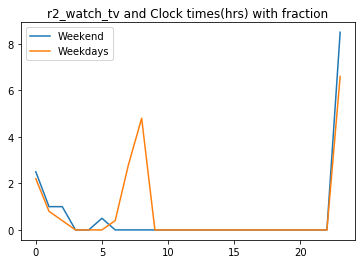

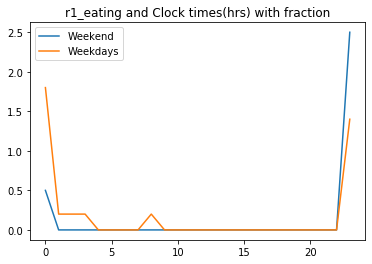

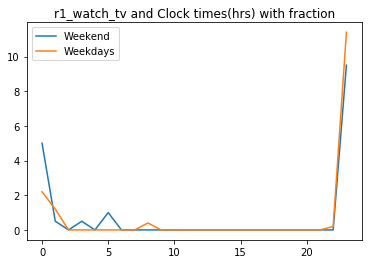

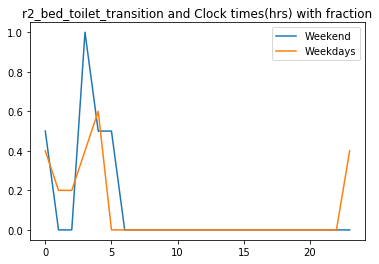

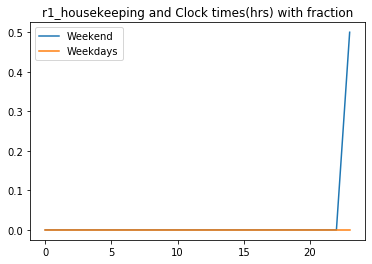

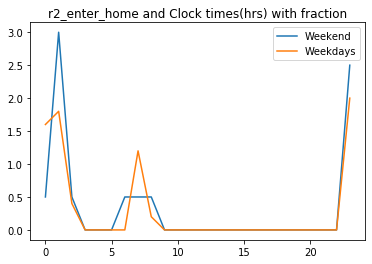

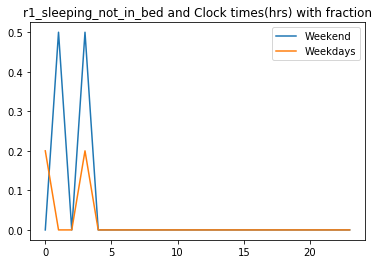

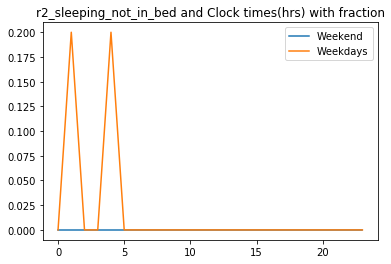

In [31]:
for i in activities:    
    plt.plot(list(range(0,24)),[x/2 for x in clock_times_weekend[i]],label='Weekend')
    plt.plot(list(range(0,24)),[x/5 for x in clock_times_weekday[i]],label='Weekdays')
    plt.legend()
    plt.title(i+' and Clock times(hrs) with fraction')
    plt.show()

## So the weekends are special in a sense where some activities are never done.

In [32]:
most_clock_times_weekdays={}
for i in activities:
    n=max(clock_times_weekday[i])
    if n !=0:
        most_clock_times_weekdays[i]=[i for i, j in enumerate(clock_times_weekday[i]) if j == n]
print("On weekdays")
print(sorted(most_clock_times_weekdays))
print(len(most_clock_times_weekdays))

most_clock_times_weekend={}
for i in activities:
    n=max(clock_times_weekend[i])
    if n !=0:
        most_clock_times_weekend[i]=[i for i, j in enumerate(clock_times_weekend[i]) if j == n]
print("On _weekends")
print(sorted(most_clock_times_weekend))
print(len(most_clock_times_weekend))

On weekdays
['bed_toilet_transition', 'cleaning', 'cooking', 'grooming', 'meal_preparation', 'r1_bathing', 'r1_bed_to_toilet', 'r1_bed_toilet_transition', 'r1_eating', 'r1_enter_home', 'r1_leave_home', 'r1_meal_preparation', 'r1_personal_hygiene', 'r1_shower', 'r1_sleep', 'r1_sleeping_not_in_bed', 'r1_wakeup', 'r1_wandering_in_room', 'r1_watch_tv', 'r1_work', 'r2_bathing', 'r2_bed_to_toilet', 'r2_bed_toilet_transition', 'r2_eating', 'r2_enter_home', 'r2_leave_home', 'r2_meal_preparation', 'r2_personal_hygiene', 'r2_shower', 'r2_sleep', 'r2_sleeping_not_in_bed', 'r2_wakeup', 'r2_wandering_in_room', 'r2_watch_tv', 'r2_work', 'study', 'wash_bathtub', 'watch_tv']
38
On _weekends
['cooking', 'grooming', 'r1_bathing', 'r1_bed_toilet_transition', 'r1_eating', 'r1_enter_home', 'r1_housekeeping', 'r1_leave_home', 'r1_meal_preparation', 'r1_personal_hygiene', 'r1_sleep', 'r1_sleeping_not_in_bed', 'r1_wandering_in_room', 'r1_watch_tv', 'r1_work', 'r2_bathing', 'r2_bed_toilet_transition', 'r2_eati

## Almost 10 activities are never performed on weekends.

### Concurrent activities

Catch such instances finding nested begin and ends

In [33]:
conc_actvts={}
from collections import deque 
stack_list = []
stack = deque()
for i in range(len(df)-1):
    if len(stack)==0 and df.iloc[i,4]==df.iloc[i+1,4] and df.iloc[i,5]=='begin' and df.iloc[i+1,5]=='end':
        i+=1
        continue
    else:
        if df.iloc[i,5]=='begin':
            stack.append(df.iloc[i,4])
            stack_list.append(df.iloc[i,4]+' '+df.iloc[i,5])
        else:
            if len(stack):
                stack.pop()
                stack_list.append(df.iloc[i,4]+' '+df.iloc[i,5])
            if len(stack)==0:
                if len(stack_list):
                    if tuple(stack_list) in conc_actvts.keys():
                        conc_actvts[tuple(stack_list)]+=1
                    else:
                        conc_actvts[tuple(stack_list)]=1
                    stack_list=[]
print(conc_actvts)

{('r1_work begin', 'r2_work begin', 'r2_work end', 'r1_work end'): 14, ('r1_sleep begin', 'r2_personal_hygiene begin', 'r2_personal_hygiene end', 'r2_sleep begin', 'r1_sleep end', 'r2_sleep end'): 1, ('r1_work begin', 'watch_tv begin', 'r1_work end', 'watch_tv end'): 2, ('r1_sleep begin', 'r2_sleep begin', 'r1_sleep end', 'r2_sleep end'): 6, ('meal_preparation begin', 'r1_bed_to_toilet begin', 'r1_bed_to_toilet end', 'meal_preparation end'): 1, ('r2_work begin', 'r1_work begin', 'r2_work end', 'r2_sleep begin', 'r1_work end', 'r1_sleep begin', 'r2_sleep end', 'r1_sleep end'): 1, ('r1_work begin', 'meal_preparation begin', 'meal_preparation end', 'r2_work begin', 'r1_work end', 'r2_work end'): 1, ('r2_sleep begin', 'r1_personal_hygiene begin', 'r1_personal_hygiene end', 'r1_sleep begin', 'r2_sleep end', 'r1_sleep end'): 1, ('r1_bed_to_toilet begin', 'r1_personal_hygiene begin', 'r1_bed_to_toilet end', 'r1_personal_hygiene end'): 1, ('meal_preparation begin', 'r2_bed_to_toilet begin', 'm

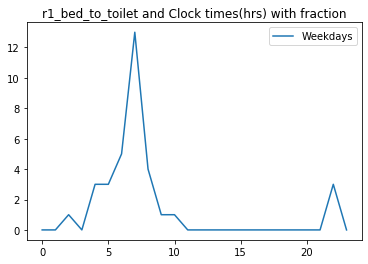

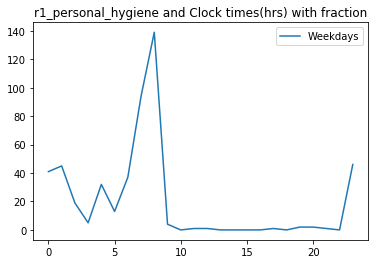

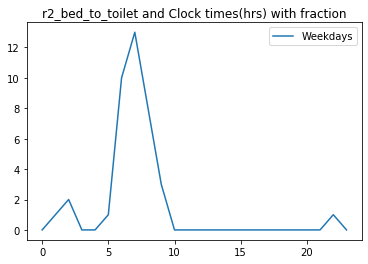

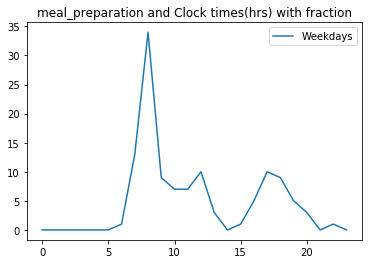

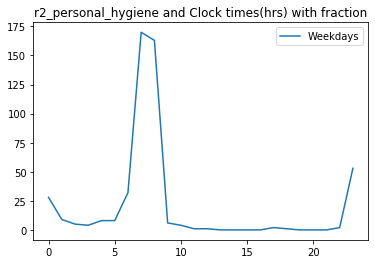

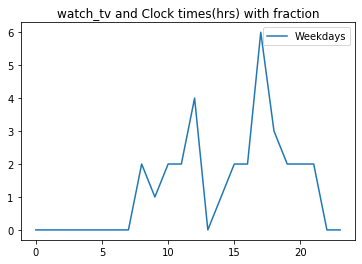

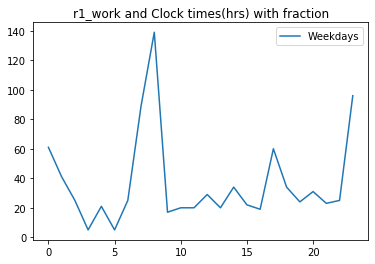

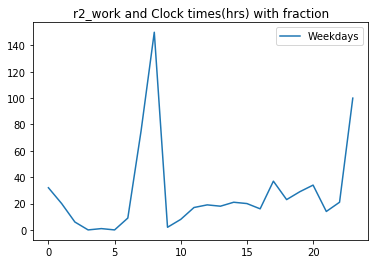

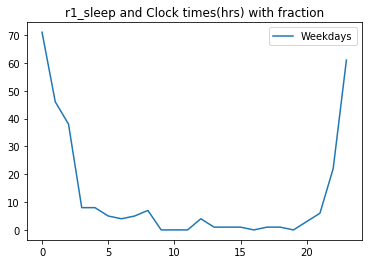

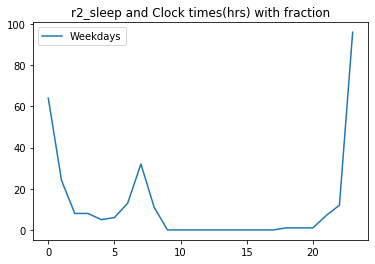

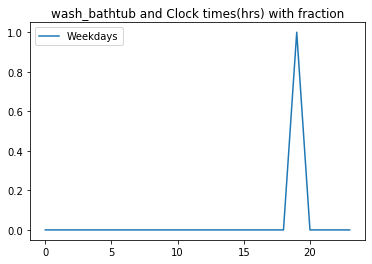

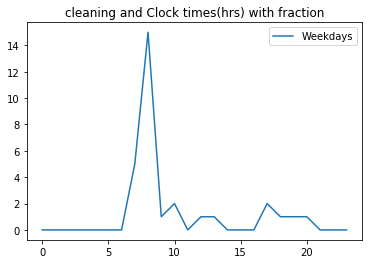

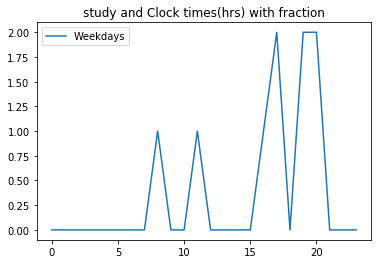

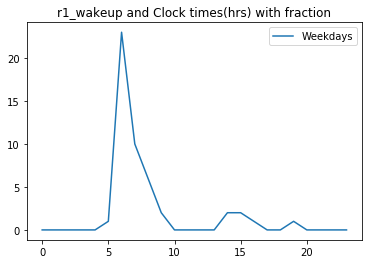

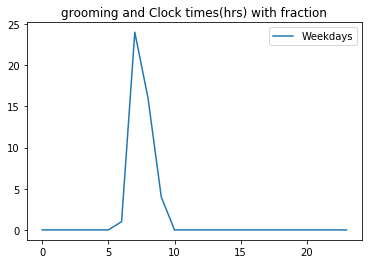

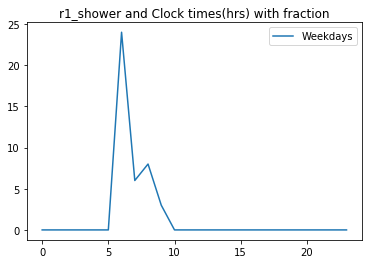

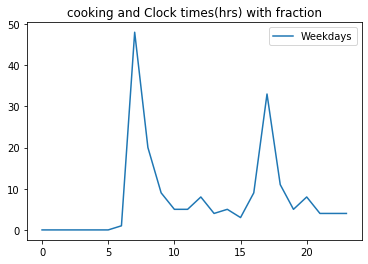

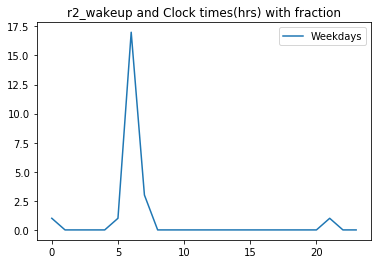

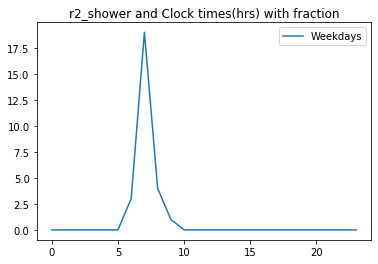

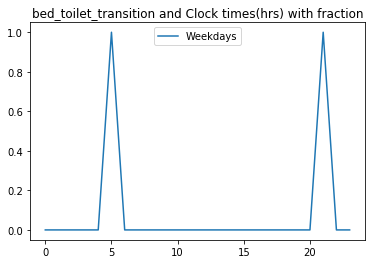

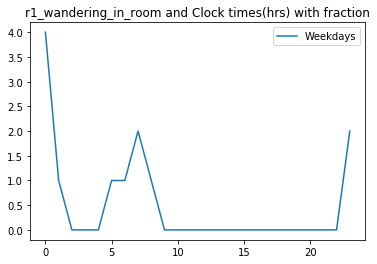

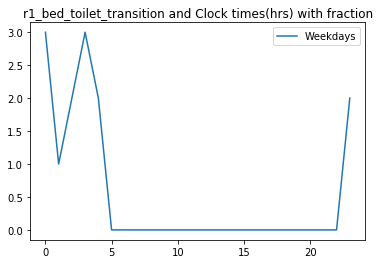

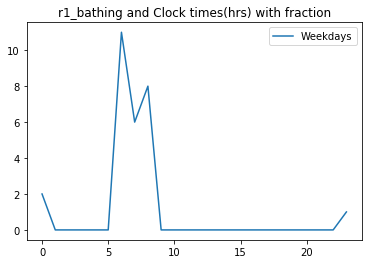

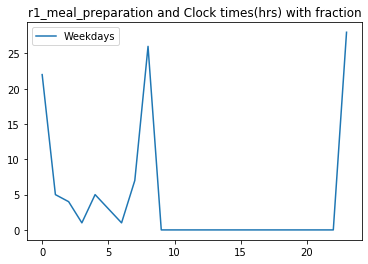

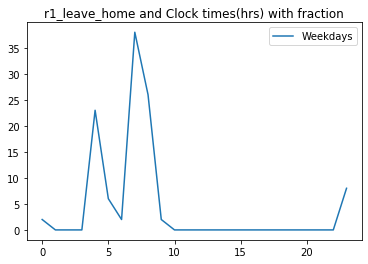

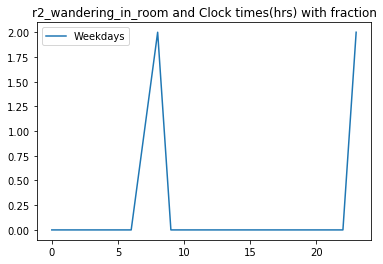

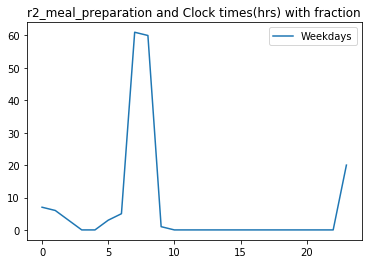

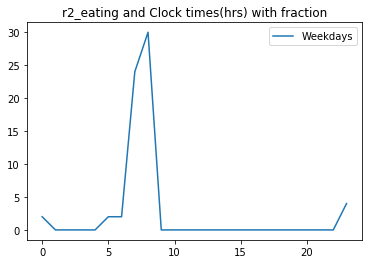

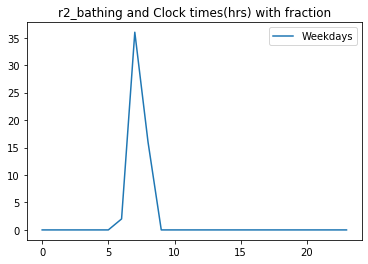

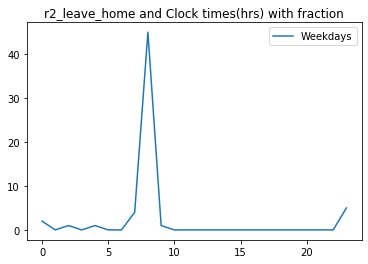

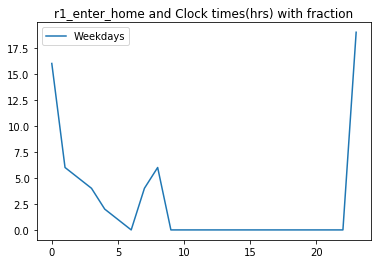

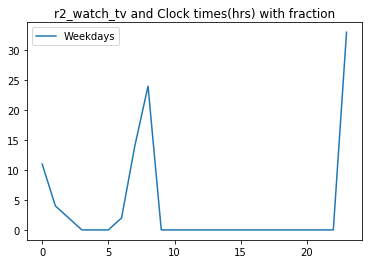

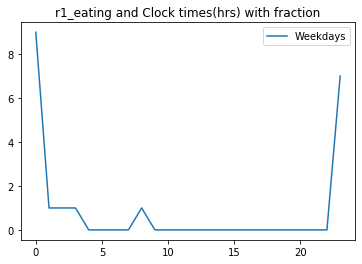

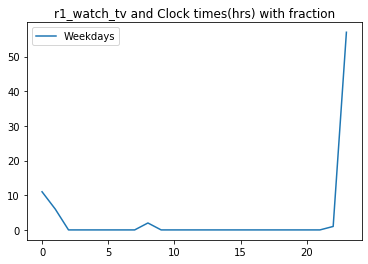

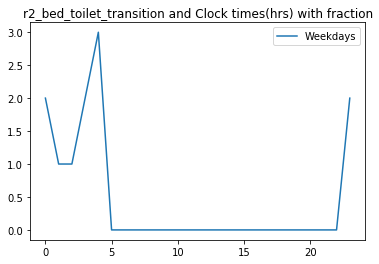

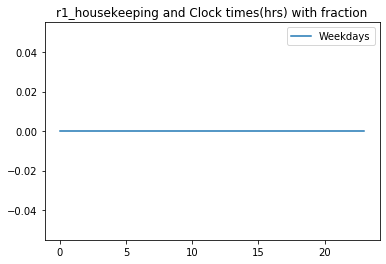

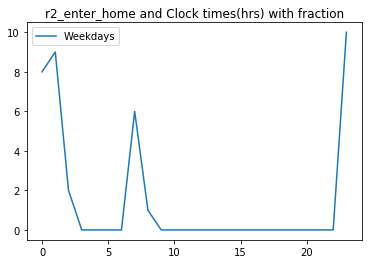

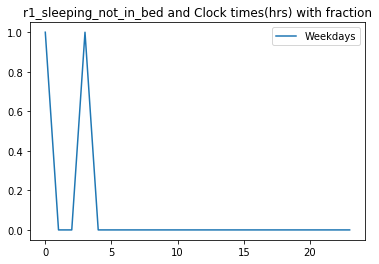

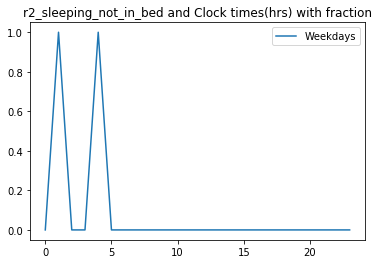

In [34]:
for i in activities:
    plt.plot(list(range(0,24)),[x for x in clock_times_weekday[i]],label='Weekdays')
    plt.legend()
    plt.title(i+' and Clock times(hrs) with fraction')
    plt.show()

In [35]:
df_resident1=df[df['Activity'].str.startswith('r1')]
df_resident1.head(10)

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
0,2009-02-02,07:15:16.575809,M35,ON,r1_bed_to_toilet,begin,2009-02-02 07:15:16.575809,Monday
1,2009-02-02,07:21:03.792759,M41,OFF,r1_bed_to_toilet,end,2009-02-02 07:21:03.792759,Monday
2,2009-02-02,07:21:04.014729,M40,OFF,r1_personal_hygiene,begin,2009-02-02 07:21:04.014729,Monday
3,2009-02-02,07:38:33.946559,M36,ON,r1_personal_hygiene,end,2009-02-02 07:38:33.946559,Monday
14,2009-02-02,14:29:03.19545,M32,ON,r1_work,begin,2009-02-02 14:29:03.019545,Monday
17,2009-02-02,17:37:22.21111,M31,OFF,r1_work,end,2009-02-02 17:37:22.021111,Monday
20,2009-02-02,19:00:18.038599,M32,OFF,r1_work,begin,2009-02-02 19:00:18.038599,Monday
21,2009-02-02,19:30:06.53464,M31,OFF,r1_work,end,2009-02-02 19:30:06.053464,Monday
22,2009-02-02,22:10:55.426609,M36,ON,r1_sleep,begin,2009-02-02 22:10:55.426609,Monday
26,2009-02-03,05:57:22.066809,M35,OFF,r1_sleep,end,2009-02-03 05:57:22.066809,Tuesday


In [36]:
df_resident2=df[df['Activity'].str.startswith('r2')]
df_resident2.head(10)

,Date,Time,Sensor,Status,Activity,Begin_or_End,Date_Time,Weekday
4,2009-02-02,07:44:12.597919,M49,ON,r2_bed_to_toilet,begin,2009-02-02 07:44:12.597919,Monday
5,2009-02-02,07:46:55.1379,M48,OFF,r2_bed_to_toilet,end,2009-02-02 07:46:55.001379,Monday
10,2009-02-02,10:51:07.09342,M46,ON,r2_personal_hygiene,begin,2009-02-02 10:51:07.009342,Monday
11,2009-02-02,11:17:06.6219,M49,OFF,r2_personal_hygiene,end,2009-02-02 11:17:06.006219,Monday
15,2009-02-02,15:23:23.042079,M48,ON,r2_work,begin,2009-02-02 15:23:23.042079,Monday
16,2009-02-02,17:36:44.601619,M45,OFF,r2_work,end,2009-02-02 17:36:44.601619,Monday
23,2009-02-02,22:24:18.955319,M50,OFF,r2_personal_hygiene,begin,2009-02-02 22:24:18.955319,Monday
24,2009-02-02,22:26:56.912709,M45,ON,r2_personal_hygiene,end,2009-02-02 22:26:56.912709,Monday
25,2009-02-02,22:29:18.64348,M45,OFF,r2_sleep,begin,2009-02-02 22:29:18.064348,Monday
27,2009-02-03,06:12:12.99674,M48,ON,r2_sleep,end,2009-02-03 06:12:12.099674,Tuesday


In [37]:
clock_times_r1={}
clock_times_r2={}
clock_times_gen={}
for i in activities:
    temp=[]
    for j in range(0,24):
        temp.append(0)
    df_temp=df[df["Activity"]==i]
    df_begin = df_temp[df_temp["Begin_or_End"]=="begin"]
    for j in range(len(df_begin)):
        temp[df_begin.iloc[j,6].hour]+=1
    if i.startswith('r1'):
        clock_times_r1[i]=temp
    elif i.startswith('r2'):
        clock_times_r2[i]=temp
    else:
        clock_times_gen[i]=temp

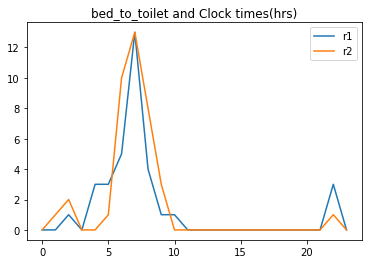

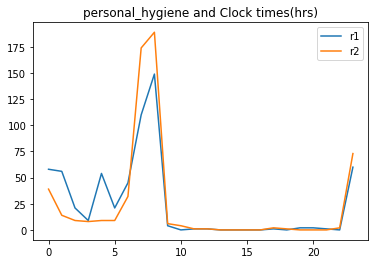

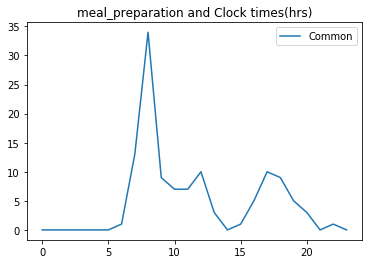

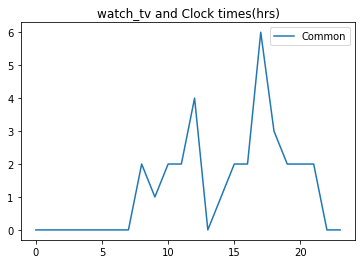

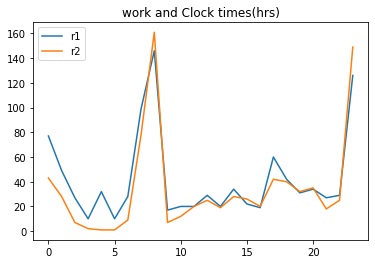

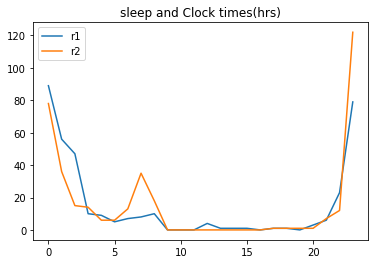

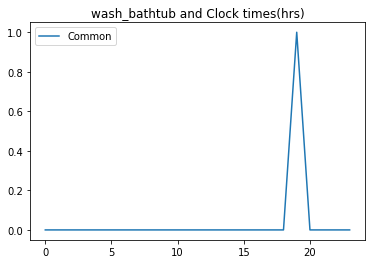

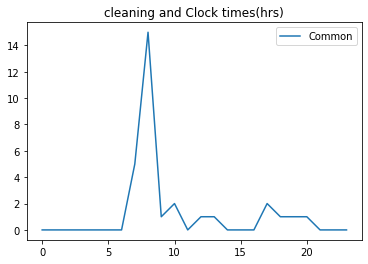

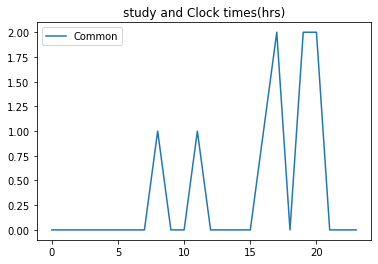

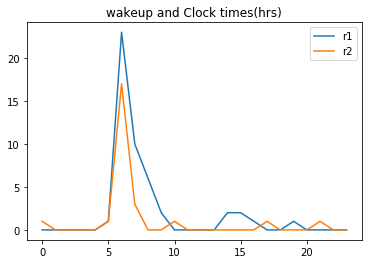

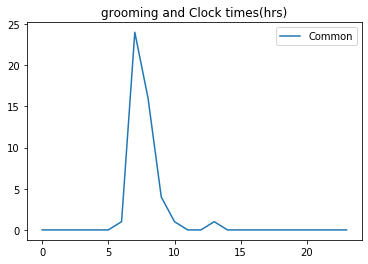

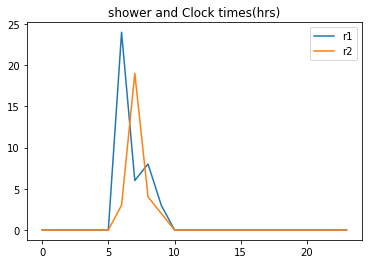

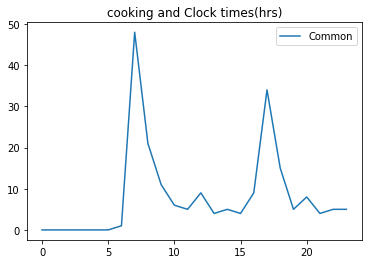

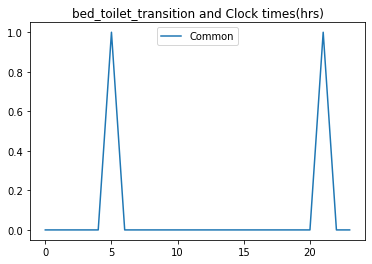

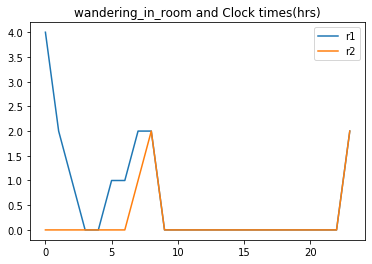

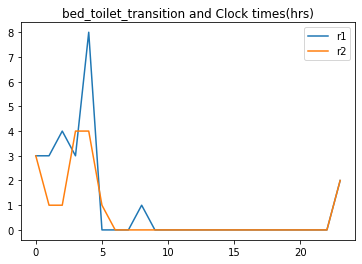

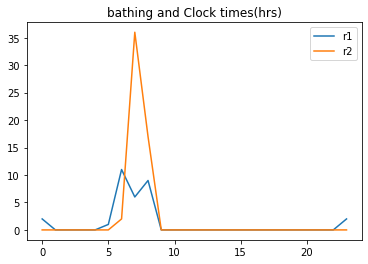

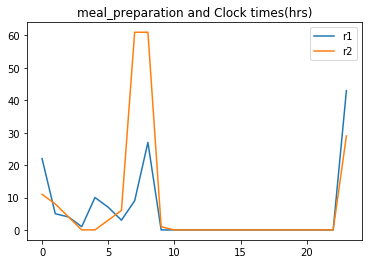

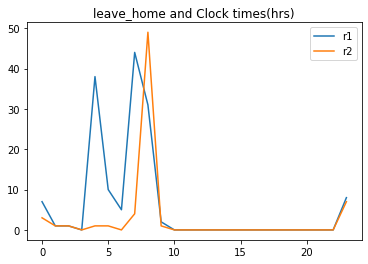

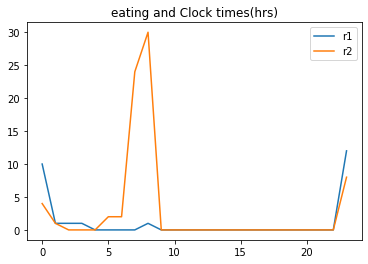

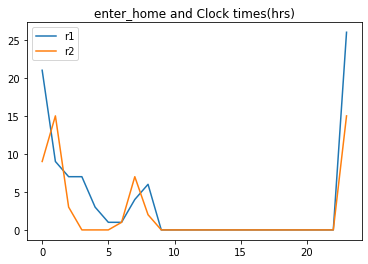

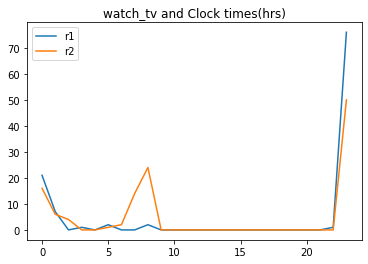

KeyError: 'r2_housekeeping'

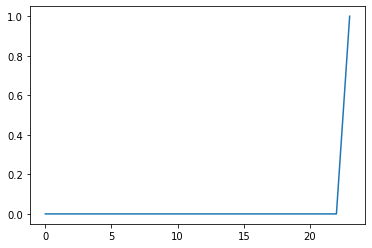

In [38]:
done=[]
for i in activities:
    if i not in done:
        if i.startswith('r1') or i.startswith('r2'):
            plt.plot(list(range(0,24)),[x for x in clock_times_r1['r1'+i[2:]]],label='r1')
            plt.plot(list(range(0,24)),[x for x in clock_times_r2['r2'+i[2:]]],label='r2')
            done.append('r1'+i[2:])
            done.append('r2'+i[2:])
        else:
            plt.plot(list(range(0,24)),[x for x in clock_times_gen[i]],label='Common')
            done.append(i)
        plt.legend()
        if i.startswith('r1') or i.startswith('r2'):
            plt.title(i[3:]+' and Clock times(hrs)')
        else:
            plt.title(i+' and Clock times(hrs)')                            
        plt.show()

In [ ]:
def con_acts(df):
    response = ''
    conc_actvts=[]
    from collections import deque 
    stack_list = []
    stack = deque()
    for i in range(len(df)-1):
        if len(stack)==0 and df.iloc[i,4]==df.iloc[i+1,4] and df.iloc[i,5]=='begin' and df.iloc[i+1,5]=='end':
            i+=1
            continue
        else:
            if df.iloc[i,5]=='begin':
                stack.append(df.iloc[i,4])
                stack_list.append(df.iloc[i,4][3:]+' '+df.iloc[i,5]+' '+str(df.iloc[i,6])+' '+df.iloc[i,4][:2])
            else:
                if len(stack):
                    stack.pop()
                    stack_list.append(df.iloc[i,4][3:]+' '+df.iloc[i,5]+' '+str(df.iloc[i,6])+' '+df.iloc[i,4][:2])
                if len(stack)==0:
                    if len(stack_list):
                        response = response+'\n'+str(stack_list)[0:]
                        conc_actvts.append(list(stack_list))
                        stack_list=[]
    print(response)
    return conc_actvts

In [ ]:
d1 = pd.DataFrame(con_acts(df_resident1))
d2 = pd.DataFrame(con_acts(df_resident2))

In [ ]:
d1.to_csv('con_resident_1.csv')
d1.to_csv('con_resident_2.csv')